# QC Machine Learning Workshop Notebook

## Content
This notebook is a general introduction to machine learning. It covers the following topics:
- **Supervised Machine Learning Overview & Jargon**
- **Data Preprocessing**
    - Missing data
    - Input standardisation
    - Categorial inputs
    - Label encoding
- **Model Fitting**
    - Decision tree fitting
    - Overfitting/Underfitting
- **Model Evaluation & Hyperparameters**
    - Train/Validation Split
    - Cross Validation
- **Hyperparameters**
    - Hyperparameters
    - Hyperparameter Tuning

#### Notebook Instructions
Run cells containing code by clicking on them and hitting **Ctrl+Enter** or by Cell>Run Cells in the drop-down menu.

#### Binder Timeout
Binder has a timeout of 10 minutes. If you are inactive for more than 10 minutes, the session will be terminated. You can restart the session by clicking on the Binder link again. Changes you made to the notebook will be lost.

### Github Repository
The code for this notebook can be found in the following [repository](https://github.com/ucgmsim/qc_ml_workshop_2024).

### Figure Credit
All figures are from the book "Sebastian Raschka, Yuxi (Hayden) Liu, and Vahid Mirjalili. Machine Learning with PyTorch and Scikit-Learn. Packt Publishing, 2022."  
 

## Machine Learning Overview


### Types of Machine Learning
<img src="resources/imgs/ml_types.png" width="1000"/>

**Only looking at supervised ML in this workshop.**

### Typical supervised ML workflow
<img src="resources/imgs/ml_workflow.png" width="1000"/>

### Classification vs Regression
Classification: Predicting a class label  

<img src="resources/imgs/ml_classification.png" width="1000">

Regression: Predicting a continuous value  

<img src="resources/imgs/ml_regression.png" width="1000">

### Jargon
<img src="resources/imgs/ml_jargon.png" width="1000">

**Sample**: A single instance of data  
**Feature**: An input variable used to make a prediction  
**Label**: The output variable we are trying to predict  
**Model**: The algorithm used to make predictions  
**Training**: The process of learning the model from the data

TODO: 
- Add figure credits

## Python Packages
- **Pandas**: Data manipulation, [website](https://pandas.pydata.org/), [user guide](https://pandas.pydata.org/docs/user_guide/index.html)
- **Numpy**: Numerical operations, [website](https://numpy.org/), [user guide](https://numpy.org/doc/stable/user/index.html)
- **Scikit-learn**: Machine learning models, [website](https://scikit-learn.org/stable/index.html), [user guide](https://scikit-learn.org/stable/user_guide.html)
- **Matplotlib**: Plotting, [website](https://matplotlib.org/), [user guide](https://matplotlib.org/stable/users/index)

## Resources for further learning

#### Free, Online
- [Kaggle "Courses"](https://www.kaggle.com/learn)

#### Books
- Machine Learning with Pytorch and Scitkit-learn, Sebastian Raschka
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron

In [1]:
# General imports 
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

## Data Preprocessing

Why?
- Garbage in, garbage out
- Data needs to be in a format that the model can understand

Additional resources:
- [Scikit-learn preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

### Missing Data
Important to check if there is missing data and handle this. 
Potential to break models, silently and non-silently.

How to handle:
- Remove rows or features with missing data
- Impute missing data, i.e. use interpolation techniques to infer missing values from the other samples, for example using the mean or median of the feature.

Handling of missing data is dataset/problem specific!    

In [2]:
from ml_nb_code import get_nan_example
df = get_nan_example()
df

,Feature1,Feature2,Feature3,Target
0,0.374540,NaN,0.731994,Safe
1,0.598658,0.156019,0.155995,Unsafe
2,0.058084,0.866176,0.601115,Unsafe
3,0.708073,0.020584,0.969910,Safe
4,0.832443,0.212339,NaN,Unsafe
5,0.183405,0.304242,0.524756,Safe
6,0.431945,0.291229,0.611853,Safe
7,NaN,0.292145,0.366362,Unsafe
8,0.456070,0.785176,0.199674,Safe
9,NaN,0.592415,0.046450,Unsafe


In [3]:
# Drop rows with missing data
df = df.dropna()
df.loc[df.isna().any(axis=1)]

,Feature1,Feature2,Feature3,Target


In [4]:
df

,Feature1,Feature2,Feature3,Target
1,0.598658,0.156019,0.155995,Unsafe
2,0.058084,0.866176,0.601115,Unsafe
3,0.708073,0.020584,0.969910,Safe
5,0.183405,0.304242,0.524756,Safe
6,0.431945,0.291229,0.611853,Safe
8,0.456070,0.785176,0.199674,Safe


### Standardisation/Normalisation

Almost all machine learning models require features to be features to be on the same scale, this prevents the model from being biased towards features with larger scales.

In [5]:
from ml_nb_code import feature_scaling
feature_scaling()

interactive(children=(FloatLogSlider(value=1.0, description='X2 Scale', max=3.0, min=-3.0, step=1.0), Output()…

Two common methods to scale features:

#### Min-Max Scaling
Transforms the data to be between a lower bound $x_min$ and upper bound $x_max$  
$X_{norm} = \frac{X - X_{min}} {X_{max} - X_{min}}$

#### Standardisation
Transforms the data to have zero mean and unit variance   
$X_{std} = \frac{X - \mu} {\sigma}$

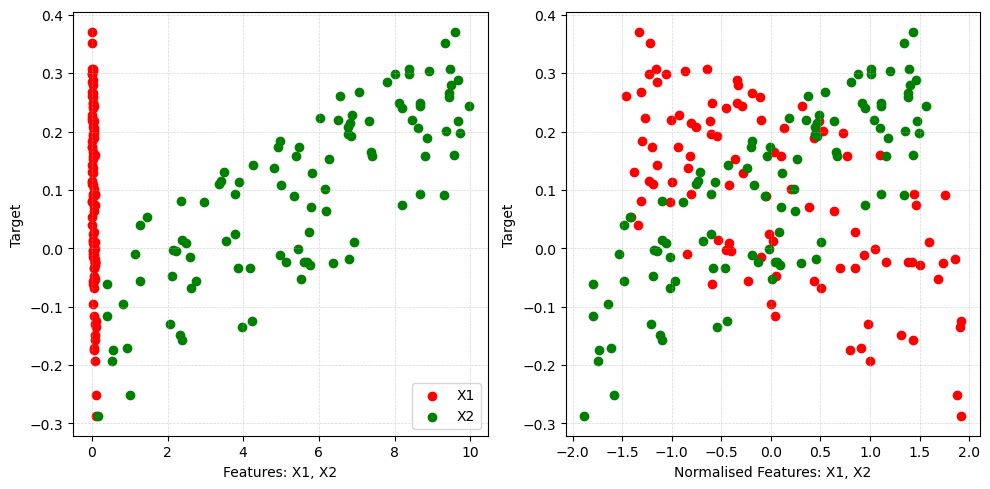

In [6]:
# Apply standardisation 
from ml_nb_code import feature_scaling_example
feature_scaling_example()

#### Implementation

In [7]:
# Manually
from ml_nb_code import get_fs_data
df = get_fs_data()

df["x1_norm"] = (df["x1"] - df["x1"].mean()) / df["x1"].std()
df["x2_norm"] = (df["x2"] - df["x2"].mean()) / df["x2"].std()

print(f"Mean: {df['x1_norm'].mean()}, Std: {df['x1_norm'].std()}")
print(f"Mean: {df['x2_norm'].mean()}, Std: {df['x2_norm'].std()}")

Mean: 8.43769498715119e-17, Std: 1.0
Mean: -1.0325074129013956e-16, Std: 0.9999999999999999


In [8]:
# Using sklearn
from ml_nb_code import get_fs_data
from sklearn.preprocessing import StandardScaler
df = get_fs_data()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (i.e. calculate the mean and standard deviation)
scaler.fit(df[["x1", "x2"]])
# Transform the data
df[["x1_norm", "x2_norm"]] = scaler.transform(df[["x1", "x2"]])

# Can combine the fit and transform steps
# df[["x1_norm", "x2_norm"]] = scaler.fit_transform(df[["x1", "x2"]])

print(f"Mean: {df['x1_norm'].mean()}, Std: {df['x1_norm'].std()}")
print(f"Mean: {df['x2_norm'].mean()}, Std: {df['x2_norm'].std()}")

Mean: -1.3211653993039362e-16, Std: 1.005037815259212
Mean: 2.7366997557010107e-16, Std: 1.0050378152592119


### Categorial Features/Inputs

Machine learning models require numerical inputs, so categorial features need to be encoded.  
There are multiple ways to do this, one of the most common approaches is one-hot encoding.

In [9]:
# Load some example data
from ml_nb_code import get_safe_unsafe_data
df = get_safe_unsafe_data()
df

,load_capacity,material_type,age,safe
0,50,Concrete,10,False
1,30,Concrete,5,True
2,70,Concrete,25,False
3,70,Steel,35,False
4,60,Steel,15,True
5,50,Steel,8,True
6,35,Steel,3,True


In [10]:
# Imports
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
encoded_data = encoder.fit_transform(df[['material_type']])

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['material_type']), dtype=int)
# Concatenate the original and encoded dataframes
result_df = pd.concat([df, encoded_df], axis=1)
result_df

,load_capacity,material_type,age,safe,material_type_Concrete,material_type_Steel
0,50,Concrete,10,False,1,0
1,30,Concrete,5,True,1,0
2,70,Concrete,25,False,1,0
3,70,Steel,35,False,0,1
4,60,Steel,15,True,0,1
5,50,Steel,8,True,0,1
6,35,Steel,3,True,0,1


### Label encoding
Similarly to features, ML models also require the target variable to be numerical. This is generally done using label encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder
df = get_safe_unsafe_data()
df

,load_capacity,material_type,age,safe
0,50,Concrete,10,False
1,30,Concrete,5,True
2,70,Concrete,25,False
3,70,Steel,35,False
4,60,Steel,15,True
5,50,Steel,8,True
6,35,Steel,3,True


In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data
df["safe_encoded"] = label_encoder.fit_transform(df["safe"])
df

,load_capacity,material_type,age,safe,safe_encoded
0,50,Concrete,10,False,0
1,30,Concrete,5,True,1
2,70,Concrete,25,False,0
3,70,Steel,35,False,0
4,60,Steel,15,True,1
5,50,Steel,8,True,1
6,35,Steel,3,True,1


In [13]:
# Inverse transform
df["safe_2"] = label_encoder.inverse_transform(df["safe_encoded"])
df

,load_capacity,material_type,age,safe,safe_encoded,safe_2
0,50,Concrete,10,False,0,False
1,30,Concrete,5,True,1,True
2,70,Concrete,25,False,0,False
3,70,Steel,35,False,0,False
4,60,Steel,15,True,1,True
5,50,Steel,8,True,1,True
6,35,Steel,3,True,1,True


## Model Fitting
Now that we have preprocessed the data, we can fit a model to it.
In this notebook we will focus solely on decision tree models, however there are many other model types available.

List of most common ML models according to ChatGPT:
> The most commonly used supervised machine learning models are:
> 
> 1. **Linear Regression**: Used for predicting continuous values by modeling the relationship between input features and the target variable.
> 
> 2. **Logistic Regression**: Used for binary classification tasks by estimating the probability that an instance belongs to a particular class.
> 
> 3. **Decision Trees**: A versatile model that splits data into subsets based on feature values, used for both classification and regression tasks.
> 
> 4. **Random Forest**: An ensemble of decision trees that improves performance by averaging the predictions of multiple trees to reduce overfitting.
> 
> 5. **Support Vector Machines (SVM)**: A powerful model for classification tasks that finds the optimal hyperplane to separate different classes.
> 
> 6. **k-Nearest Neighbors (k-NN)**: A simple classification model that assigns labels based on the majority class of the k-nearest neighbors in the training data.
> 
> 7. **Naive Bayes**: A probabilistic classifier based on Bayes' theorem, assuming independence between features, often used for text classification.
> 
> 8. **Gradient Boosting Machines (GBM)**: An ensemble model that builds trees sequentially, with each new tree correcting errors made by the previous ones (e.g., XGBoost, LightGBM, CatBoost).
> 
> 9. **Neural Networks**: Particularly effective for complex tasks like image recognition and natural language processing, neural networks can model intricate patterns by learning from multiple layers of abstraction.
> 
> 10. **k-Nearest Neighbors (k-NN)**: A non-parametric model used for both classification and regression, which predicts the output based on the closest training examples in the feature space.
> 
> These models are widely used due to their effectiveness across various domains and their ability to handle different types of data and tasks.

The scikit-learn library has implementation for almost all of these, see the [documentation](https://scikit-learn.org/stable/user_guide.html) for more details.

### Decision Tree Concepts

In [14]:
### TODO: Check that this is working correctly?
# From David Dempsey's notebook
# from ml_nb_code import decision_tree_old
# decision_tree_old()

from ml_nb_code import decision_tree
decision_tree()

# TASK 1
# move the top slider to divide the dataset, trying both features
# try to separate the safe and unsafe bridges as much as possible
# when you are satisfied with the split of data, check the box to lock the root node

# TASK 2
# repeat the exercise for the lefthand and righthand sliders below
# further separate and subdivide the data, trying to distinguish the two binary classes
# can you construct a decision tree that classifies the two bridge types based on their features?

# Consider the original dataframe given in the cells above. Which part is the feature matrix X, and
# which is the label vector y?
# What are the parameters of this model? What are the hyperparameters?

# TASK 3
# Suppose you are given a new bridge: load_capacity of 45, steel, and 10 years old. What would your model predict?

Output()

## Dataset
For the rest of this notebook we will use the heart disease dataset from the UCI Machine Learning Repository. You can find additional information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

The aim of this dataset is to predict whether a patient has heart disease or not based on a number of features. The target variable is binary, i.e. 0 for no heart disease and 1 for heart disease.  
There are a total of 14 features in the dataset, some of which are categorical and some numerical.   
For simplicity, we will only utilise three of these features: `thalach` (maximum heart rate achieved), `oldpeak` (ST depression induced by exercise relative to rest), and `thal` (thalassemia).

### Descision Tree (Hands on)
- Hands on data pre-processing of the heart disease dataset (todo: add details)
- Train a decision tree classifier

In [15]:
### Import relevant libraries and load the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from ml_nb_code import get_heart_df

heart_df = get_heart_df(features=["thalach", "oldpeak", "thal"])
heart_df

,thalach,oldpeak,thal,target
0,150.0,2.3,Fixed_defect,Presence
1,108.0,1.5,Normal,No Presense
2,129.0,2.6,Reversable_defect,No Presense
3,187.0,3.5,Normal,Presence
4,172.0,1.4,Normal,Presence
...,...,...,...,...
297,123.0,0.2,Reversable_defect,No Presense
298,132.0,1.2,Reversable_defect,No Presense
299,141.0,3.4,Reversable_defect,No Presense
300,115.0,1.2,Reversable_defect,No Presense


In [16]:
## Hands-On - Prepare the data

### Solution -- Hidden

# Check for missing values
print(heart_df.isna().sum())

# Normalise the features
numerical_features = ["thalach", "oldpeak"]
std_scaler = StandardScaler()
heart_df[numerical_features] = std_scaler.fit_transform(heart_df[numerical_features])

# Encode the categorical features
categorical_features = ["thal"]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(heart_df[categorical_features])
heart_df[encoder.get_feature_names_out()] = encoded_data

# Encode the labels
label_encoder = LabelEncoder()
heart_df["target_encoded"] = label_encoder.fit_transform(heart_df["target"])

features = numerical_features + list(encoder.get_feature_names_out())

thalach    0
oldpeak    0
thal       0
target     0
dtype: int64


In [17]:
heart_df

,thalach,oldpeak,thal,target,thal_Fixed_defect,thal_Normal,thal_Reversable_defect,target_encoded
0,0.017494,1.068965,Fixed_defect,Presence,1.0,0.0,0.0,1
1,-1.816334,0.381773,Normal,No Presense,0.0,1.0,0.0,0
2,-0.899420,1.326662,Reversable_defect,No Presense,0.0,0.0,1.0,0
3,1.633010,2.099753,Normal,Presence,0.0,1.0,0.0,1
4,0.978071,0.295874,Normal,Presence,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
297,-1.161395,-0.734914,Reversable_defect,No Presense,0.0,0.0,1.0,0
298,-0.768432,0.124076,Reversable_defect,No Presense,0.0,0.0,1.0,0
299,-0.375469,2.013854,Reversable_defect,No Presense,0.0,0.0,1.0,0
300,-1.510696,0.124076,Reversable_defect,No Presense,0.0,0.0,1.0,0


In [18]:
# Fit a decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(heart_df[features], heart_df["target_encoded"])

# Get model predictions
y_pred = clf.predict(heart_df[features])

# Calculate accuracy
accuracy = accuracy_score(heart_df["target_encoded"], y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


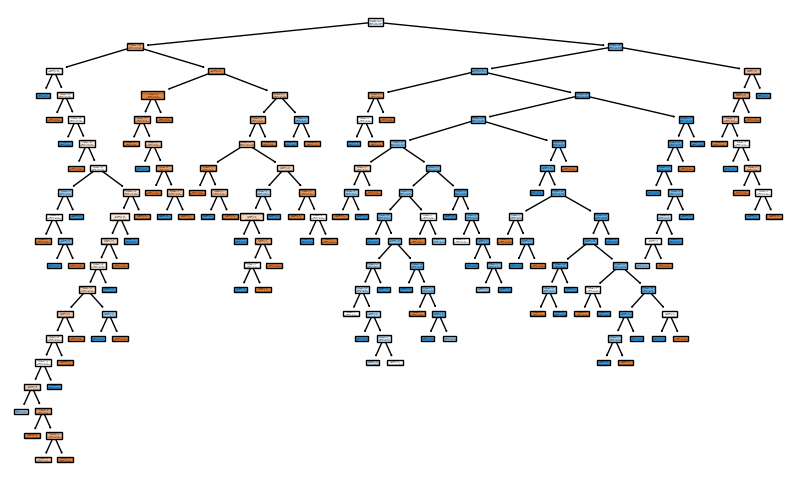

In [19]:
# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, impurity=False, feature_names=features, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

Note: Left corresponds to True, Right corresponds to False

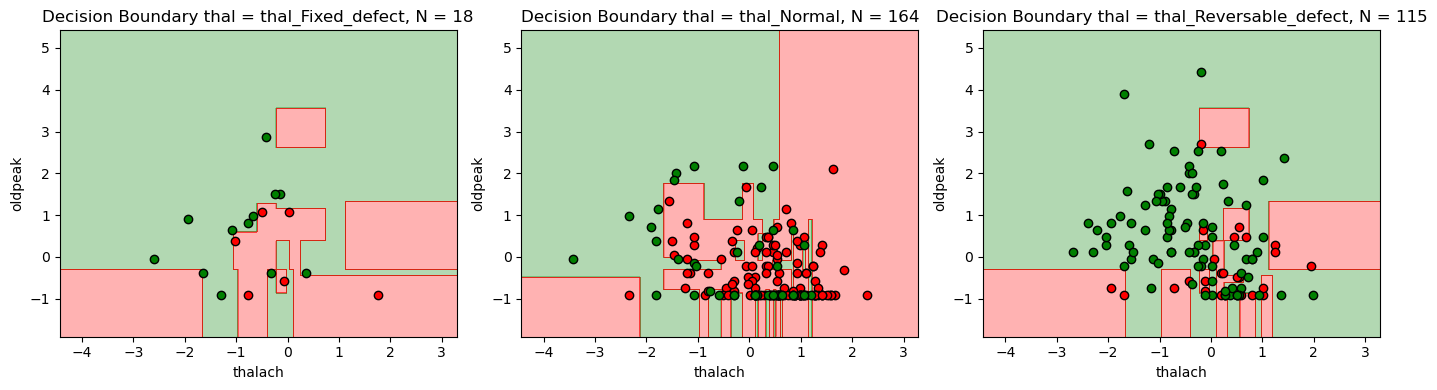

In [20]:
# Plot decision boundaries
from ml_nb_code import plot_decision_boundary_heart
plot_decision_boundary_heart(heart_df, clf, features)

### Overfitting and Underfitting

In [21]:
from ml_nb_code import linear_regression_fitting_example
linear_regression_fitting_example()

Output()

## Model Evaluation
- Evaluate model performance on unseen data

### Holdout Method
- Split available (labelled) data into a training and validation set (also sometimes called testing set)
- Generally split data 80% for training and 20% for validation
- Scikit-learn has a function for this: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Cross Validation
- Allows for better estimation of model performance
- Gives indication on uncertainty in the model performance
- Also supported by scikit-learn: [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

<img src="resources/imgs/ml_cross_val.png" width="1000"/>

TODO:
- Add interactive example for both train/val split and cross validation to show effect of train/val proportion and number of folds


In [22]:
### Holdout Example
from ml_nb_code import get_prepped_heart_df
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
seed = 42

heart_df, feature_keys, _ = get_prepped_heart_df()

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(heart_df[feature_keys],
                                                  heart_df["target_encoded"],
                                                  test_size=0.2,
                                                  random_state=seed)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=seed)

# Train the model on the training data
clf.fit(train_df[feature_keys], train_df["target_encoded"])

# Get model predictions
train_y_pred = clf.predict(train_df[feature_keys])
val_y_pred = clf.predict(val_df[feature_keys])

# Calculate accuracy
train_accuracy = accuracy_score(train_df["target_encoded"], train_y_pred)
val_accuracy = accuracy_score(val_df["target_encoded"], val_y_pred)

print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Number of training samples: 237
Number of validation samples: 60
Training Accuracy: 0.9662
Validation Accuracy: 0.7000


In [23]:
### Interactive holdout example
from ml_nb_code import run_train_val_split_example
run_train_val_split_example()

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='Validation size:', max=0.95…

Output()

In [24]:
### Cross Validation Example
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from ml_nb_code import get_prepped_heart_df
import numpy as np

heart_df, feature_keys, _ = get_prepped_heart_df()

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(clf, heart_df[feature_keys], heart_df["target_encoded"], cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {', '.join([f'{cur_score:.3f}' for cur_score in cv_scores])}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.2f}")

Cross-validation scores: 0.667, 0.700, 0.712, 0.593, 0.610
Mean cross-validation score: 0.66
Standard deviation of cross-validation scores: 0.05


In [25]:
### Interactive cross validation example
from ml_nb_code import run_cv_example
run_cv_example()

interactive(children=(IntSlider(value=5, continuous_update=False, description='Number of splits:', max=10, min…

Output()

## How to address overfitting/underfitting?

### Overfitting
- Collect more data
- Reduce the complexity of the model
- Regularization

### Underfitting
- Increase the complexity of the model
- Different model type

## Hyperparameters
- Parameters that are not learned during training
- Generally set before training the model
- Can have a large impact on model performance, i.e. very useful for addressing overfitting/underfitting
- Model type specific
- Examples for a Decision Tree:
    - Maximum depth of the tree
    - Minimum number of samples required to split a node
    - Minimum number of samples required at each leaf node
    - For a full list see the Decision Tree [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Training Accuracy: 0.8143
Validation Accuracy: 0.8000


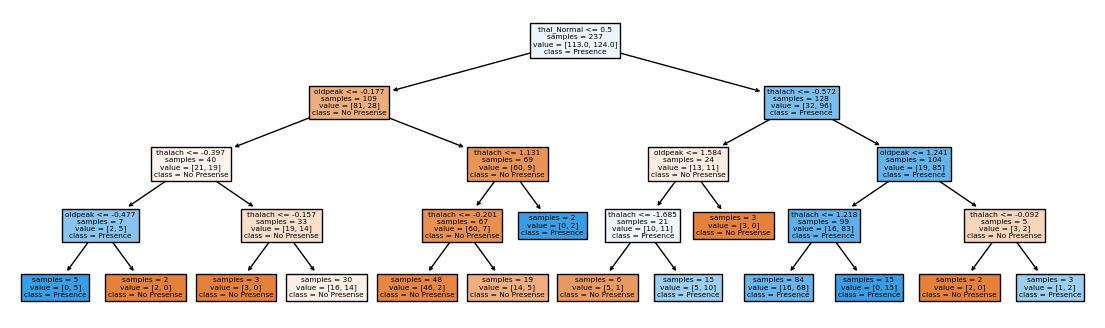

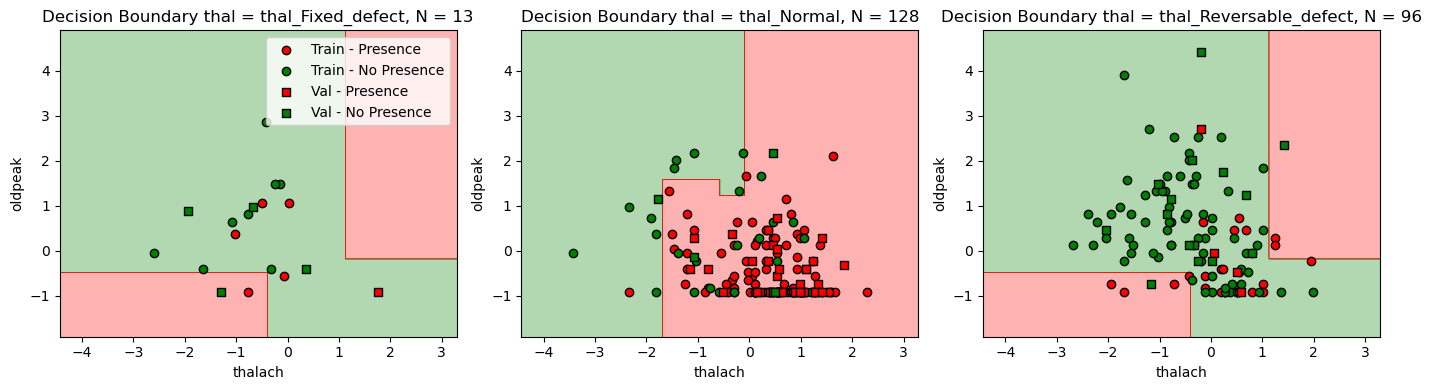

In [26]:
### Hyperparameter Example
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from ml_nb_code import get_prepped_heart_df
seed = 42

heart_df, features, label_encoder = get_prepped_heart_df()

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(heart_df[features],
                                                  heart_df["target_encoded"],
                                                  test_size=0.2,
                                                  random_state=seed)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=seed, max_depth=4)

# Train the model on the training data
clf.fit(train_df[features], train_df["target_encoded"])

# Get model predictions
train_y_pred = clf.predict(train_df[features])
val_y_pred = clf.predict(val_df[features])

# Calculate accuracy
train_accuracy = accuracy_score(train_df["target_encoded"], train_y_pred)
val_accuracy = accuracy_score(val_df["target_encoded"], val_y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Visualize the decision tree
plt.figure(figsize=(14, 4))
plot_tree(clf, filled=True, impurity=False, feature_names=features, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

from ml_nb_code import plot_decision_boundary_heart
plot_decision_boundary_heart(train_df, clf, features, val_df=val_df, figsize=(14, 4))

In [27]:
### Interactive Hyperparameter Example
from ml_nb_code import hyperparam_tuning_example
hyperparam_tuning_example()

Output()

## How to select the "best" hyperparameter values?

### Hyperparameter tuning
- Basic idea: Search through different hyperparameter values and evaluate the model performance
- Lots of different methods available, see the [Scikit-learn User Guide](https://scikit-learn.org/stable/modules/grid_search.html) for more details

##### Grid Search
Determines the best hyperparameters by exhaustively searching through a specified parameter grid   

##### Random Search
Determines the best hyperparameters by randomly sampling from a specified parameter grid

<img src="resources/imgs/ml_hyper_tuning.png" width="1000"/>

In [28]:
### Grid Search Example
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from ml_nb_code import get_prepped_heart_df

heart_df, feature_keys, _ = get_prepped_heart_df()

# Create the classifier
rf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for the search
param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Perform the grid search using cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5, scoring='accuracy')
grid_search.fit(heart_df[feature_keys], heart_df["target_encoded"])

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [29]:
# Create a dataframe with the results
results = []
for cur_param in param_grid.keys():
    results.append(pd.DataFrame(grid_search.cv_results_)[f"param_{cur_param}"])

results_df = pd.concat(results, axis=1)
results_df["mean_test_score"] = grid_search.cv_results_["mean_test_score"]
results_df["std_test_score"] = grid_search.cv_results_["std_test_score"]

In [30]:
results_df.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,std_test_score
19,4,20,1,0.747345,0.042022
24,4,2,10,0.747175,0.052363
26,4,10,10,0.747175,0.052363
25,4,5,10,0.747175,0.052363
27,4,20,10,0.747175,0.052363
18,4,10,1,0.744011,0.043631
17,4,5,1,0.744011,0.043631
16,4,2,1,0.740621,0.048963
11,2,20,10,0.740565,0.024646
4,2,2,5,0.740565,0.024646


## Full Hands-On Example
- Add details here for a full hands on example
TODO: 
- Determine which dataset to use for this